Build a simple linear regression model to predict the umbrella sold using the amount of rainfall [SLR dataset given]. 1. Create a frame for the dataset and print its description and shape. 2. Using statsmodel.api develop a simple linear regression model between umbrella sold and amount of rainfall. 3. Print the estimated model parameters on the training set. 4. Discuss the performance of your model and the relevance of the input variables based on the model summary. 5. Calculate the influence of each observation using cooks distance. Plot a stem graph for the same.

In [ ]:
import pandas as pd
data = pd.read_csv("/content/sample_data/SLR dataset.csv")

In [ ]:
data.head()

,S.No,Rainfall (mm),Umbrellas sold
0,1,82.0,15
1,2,92.5,25
2,3,83.2,17
3,4,97.7,28
4,5,131.9,41


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   S.No            24 non-null     int64  
 1   Rainfall (mm)   24 non-null     float64
 2   Umbrellas sold  24 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 704.0 bytes


In [ ]:
data.shape

(24, 3)

In [ ]:
data.isnull().sum()

S.No              0
Rainfall (mm)     0
Umbrellas sold    0
dtype: int64

In [ ]:
import statsmodels.api as sm
x = sm.add_constant(data['Rainfall (mm)'])

In [ ]:
x.head()

,const,Rainfall (mm)
0,1.0,82.0
1,1.0,92.5
2,1.0,83.2
3,1.0,97.7
4,1.0,131.9


In [ ]:
y = data['Umbrellas sold']

In [ ]:
y.head()

0    15
1    25
2    17
3    28
4    41
Name: Umbrellas sold, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,train_size = 0.8,random_state=100)

In [ ]:
train_x.shape

(19, 2)

In [ ]:
test_x.shape

(5, 2)

In [ ]:
data_lm = sm.OLS(train_y,train_x).fit()

In [ ]:
print(data_lm.params)

const           -23.842323
Rainfall (mm)     0.496956
dtype: float64


In [ ]:
print(data_lm.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.922   
Dependent Variable: Umbrellas sold   AIC:                102.2129
Date:               2021-11-26 04:48 BIC:                104.1018
No. Observations:   19               Log-Likelihood:     -49.106 
Df Model:           1                F-statistic:        212.3   
Df Residuals:       17               Prob (F-statistic): 4.90e-11
R-squared:          0.926            Scale:              11.501  
-----------------------------------------------------------------
                Coef.   Std.Err.    t    P>|t|   [0.025   0.975] 
-----------------------------------------------------------------
const          -23.8423   3.8501 -6.1926 0.0000 -31.9654 -15.7192
Rainfall (mm)    0.4970   0.0341 14.5722 0.0000   0.4250   0.5689
-----------------------------------------------------------------
Omnibus:               0.451        Durbin-Watson:          1.687
Prob(Omnibus):         0.79

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


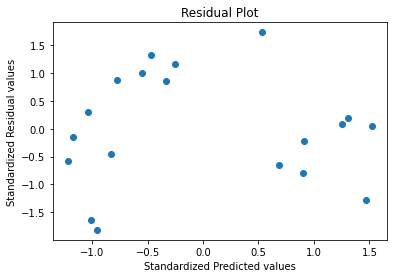

In [ ]:
import matplotlib.pyplot as plt
def get_std_values(vals):
  return(vals - vals.mean())/vals.std()
x_axis = get_std_values(data_lm.fittedvalues)
y_axis = get_std_values(data_lm.resid)
plt.scatter(x_axis,y_axis)
plt.xlabel("Standardized Predicted values")
plt.ylabel("Standardized Residual values")
plt.title("Residual Plot")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


<function matplotlib.pyplot.show>

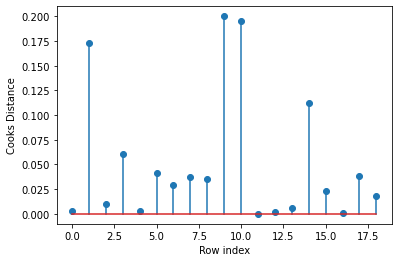

In [ ]:
import numpy as np
mba_influence = data_lm.get_influence()
(c,p) = mba_influence.cooks_distance
plt.stem(np.arange(len(train_x)),np.round(c,3))
plt.xlabel("Row index")
plt.ylabel("Cooks Distance")
plt.show